In [13]:
import pandas as pd
import matplotlib.pyplot as plot

In [4]:
data = pd.read_csv('backtest_data.csv')

Trade 1, Profit: -1538.461538461539
Trade 3, Profit: 201.46520146520015
Trade 5, Profit: -376.6523331740718
Trade 7, Profit: 1064.3020056661844
Trade 9, Profit: 879.1212537645606
Trade 11, Profit: -784.2827185099595
Trade 13, Profit: -1244.7547426570254
Trade 15, Profit: -214.3983562900221
Trade 17, Profit: 550.7819842623003
Trade 23, Profit: 592.3716442984314
Trade 25, Profit: -599.7476759363253
Trade 27, Profit: 394.4390624012831
Trade 29, Profit: -99.15759763143251
Trade 31, Profit: -409.600371650522
Trade 33, Profit: -206.0920608378874
Trade 35, Profit: 138.20427199847109
Trade 37, Profit: 402.984594489335
Trade 39, Profit: -100.0059728365377
Trade 41, Profit: 729.5616452111226
Trade 43, Profit: 1940.7058542561863
Trade 45, Profit: 1848.2912897677961
Trade 49, Profit: -1000.1829447794098
Trade 51, Profit: 417.56003658682675
Trade 53, Profit: -1138.7742766507454
Trade 55, Profit: -1750.8213801385755
Trade 57, Profit: -36.18230177094665
Trade 59, Profit: -1370.7713920925453
Trade 61,

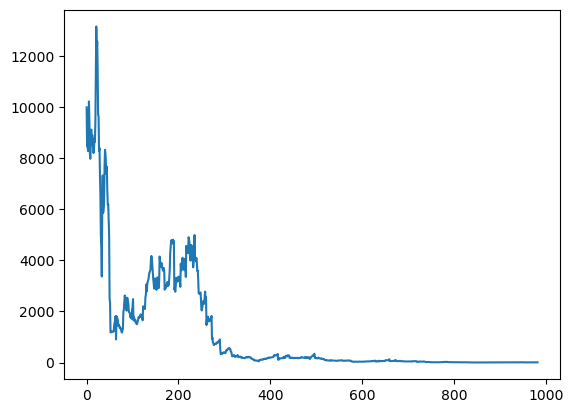

In [ ]:
balance = 10000
balance_points = [10000]

for index, row in data.iterrows():
    if row['call_buy'] == True:
        buy_price = row['call_prices']
        sell_price = data.at[(index+1, 'call_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
            new_balance = balance * ((p_l/buy_price) + 1)
        elif p_l < 0:
            new_balance = balance * (1 - ((buy_price - sell_price)/buy_price))
        else:
            continue

    
    elif row['put_buy'] == True:
        buy_price = row['put_prices']
        sell_price = data.at[(index+1, 'put_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
           new_balance = balance * ((p_l/buy_price) + 1)
        elif p_l < 0:
            new_balance = balance * (1 - ((buy_price - sell_price)/buy_price))
        else:
            continue
        
    else:
        continue
    
    print(f'Trade {index+1}, Profit: {new_balance - balance}')
    balance = new_balance
    balance_points.append(balance)

plot.plot(balance_points)
percent_gain = round(((balance - 10000) / 10000) * 100, 2)
print(f'Gain: {percent_gain}%')

Overall Unnsuccesful trading startegy. While I beleive that it could work. Having to supplement missing data with data from a minute later ultimately defeats the point of the stretgy. More testing possibly but would need subscription to polygon.io. 8 hour runtime for reteriebing options data